In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
#Step 1: Import dataset
df = pd.read_csv('Drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df['Sex'].replace(['F','M'],[0, 1], inplace=True)
df['BP'].replace(['HIGH', 'NORMAL','LOW'],[0, 1, 2], inplace=True)
df['Cholesterol'].replace(['HIGH', 'NORMAL'],[0, 1], inplace=True)
df['Drug'].replace(['drugA','drugB','drugC','drugX','drugY'],[0, 1, 2, 3, 4], inplace=True)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,2,0,13.093,2
2,47,1,2,0,10.114,2
3,28,0,1,0,7.798,3
4,61,0,2,0,18.043,4


In [5]:
X=df.iloc[:,:-1]
y=df['Drug']

In [6]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int64

In [7]:
#Step3: Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [9]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
cm

array([[ 9,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 17,  1],
       [ 0,  0,  0,  0, 24]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.94      0.97        18
           4       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [14]:
# !conda install python-graphviz
# !pip install pydotplus

^C


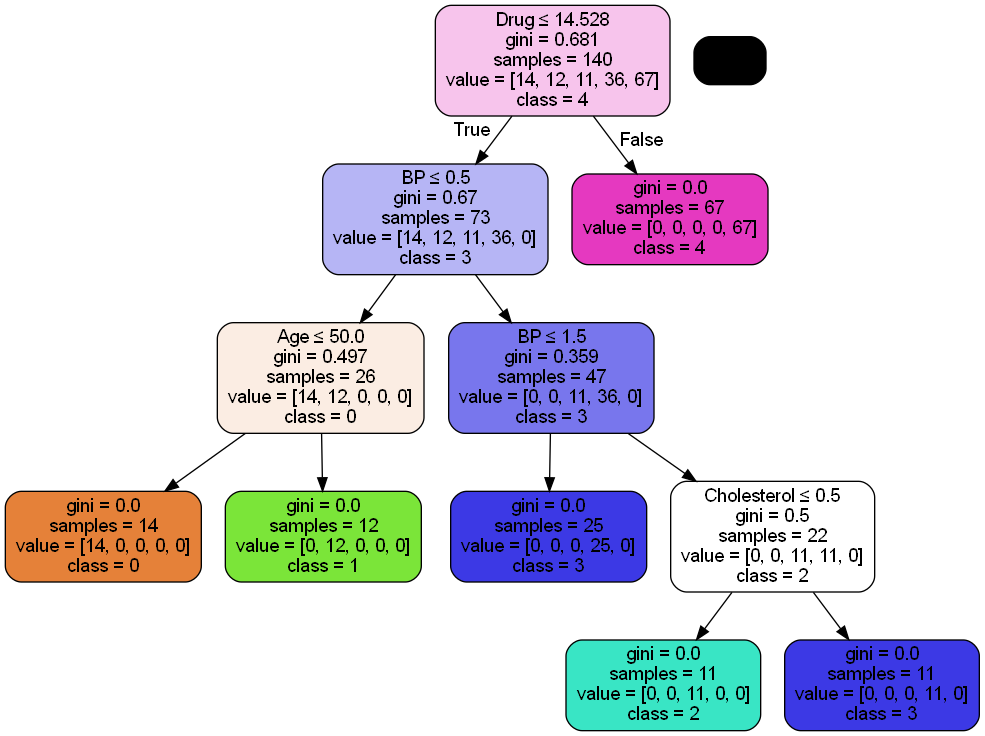

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Drug']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())